# matplotlib: plotting package

![Salinity](http://pong.tamu.edu/~kthyng/movies/txla_plots/salt/2004-07-30T00.png)
http://kristenthyng.com/gallery/txla_salinity.html

Data and model results can be abstract if we can't see how they look. Also, it is easy to get too removed from  calculations and end up with answers that don't make sense. A straight-forward way to investigate information and to have a reality check is by plotting it up. Here we will cover the basics for making a variety of commonly-used plots.

matplotlib provides a [gallery](http://matplotlib.org/gallery.html) of plot examples, as described by text and shown as plots. This is really helpful for finding what you want to do when you don't know how to describe it, and to get ideas for what possibilities are out there.

To produce figures inline in Jupyter notebooks, you need to run the command `%matplotlib inline`.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

A quick plot without any setup:

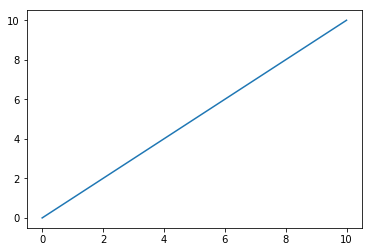

In [2]:
x = np.linspace(0, 10)
plt.plot(x, x)

You can subsequently alter the plot with commands like `plt.xlabel('xlabel')` which act on the active figure, but you can only reference one figure at a time when they are not named.

So, problems with this:

* Less control
* Harder to make changes later
* Alters any figure you may already have open

So, don't screw over future you! Set up your plot properly from the beginning

# A. Figure overview

A figure in matplotlib has several basic pieces, as shown in the following image. Note that `axes` refers to the area within a figure that is used for plotting and `axis` refers to a single x- and y-axis.

![fig](http://matplotlib.org/_images/fig_map.png)
http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure


## Figure and axes setup

Steps for setting up a figure:

1. Open a figure, save the object to a variable, and size it as desired.
2. Add axes to the figure. Axes are the objects in which data is actually plotted.
3. Add labels to clearly explain the plot, such as axis labels and a title.
4. Plot! Most basically, use the `plot` command to plot lines and markers.

Here is a good way to set up a general figure so that you can easily work with it:

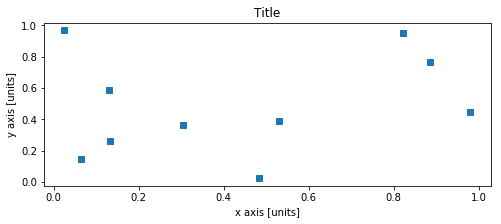

In [3]:
# Step 1
fig = plt.figure(figsize=(8, 3))  # figure size is given as a (width, height) tuple
# Step 2
ax = fig.add_subplot(111)  # 
# Step 3
ax.set_xlabel('x axis [units]')
ax.set_ylabel('y axis [units]')
ax.set_title('Title')

x = np.random.rand(10)
y = np.random.rand(10)
# Step 4
ax.plot(x, y, 's')

## Useful commands and keyword arguments

These commands and keyword arguments should be frequently used to customize and properly label your figures. Command syntax shown is common usage, not all available options.

### labels and text

`ax.set_xlabel(xlabel, fontsize, color)`, `ax.set_ylabel(ylabel, fontsize, color)`: Label the x and y axis with strings xlabel and ylabel, respectively. This is where you should state what is being plotted, and also give units.

`ax.set_title(Title, fontsize, color)`: Label the top of the axes with a title describing the plot.

[`fig.suptitle(Suptitle, fontsize, color)`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.suptitle): Label the overall figure, above any subplot titles.

[`ax.text(x, y, text, color, transform=ax.transAxes)`](http://matplotlib.org/api/text_api.html#matplotlib.text.Text): Write text in your axes. The text will appear at location (x,y) in data coordinates — often it is easier to input the location in units of the axes itself (from 0 to 1), which is done by setting transform=ax.transAxes. The text is input as a string and `color` controls the color of the text.

### [subplot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

`fig.add_subplot(nrows, ncols, plot_number)`

Above, we showed an example of adding a single axes to the figure, with the command `fig.add_subplot(111)`. This command can be used to add multiple axes to the figure instead of a single one. These subplots can divide up the available space in the figure only in a simple way, which is enough for most cases.

An example with 1 row and 2 columns of axes is shown, with the `plot_number` increasing from 1 across the rows then columns, up to the number of axes (2, in this case).

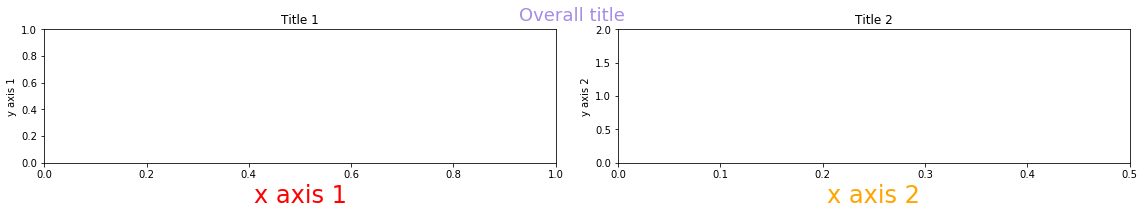

In [4]:
# subplot example
fig = plt.figure(figsize=(16, 3))

ax1 = fig.add_subplot(1, 2, 1)  # 1st subplot
ax1.set_xlabel('x axis 1', fontsize=24, color='r')
ax1.set_ylabel('y axis 1')
ax1.set_title('Title 1')

ax2 = fig.add_subplot(1, 2, 2)  # 2nd subplot
ax2.set_xlabel('x axis 2', fontsize=24, color='orange')
ax2.set_ylabel('y axis 2')
ax2.set_title('Title 2')
ax2.set_xlim(0, 0.5)
ax2.set_ylim(0, 2)

fig.suptitle('Overall title', fontsize=18, color=(0.3, 0.1, 0.8, 0.5))
fig.tight_layout()  # helper function to clean up plot

### [subplots](http://matplotlib.org/examples/pylab_examples/subplots_demo.html)

`fig, axes = plt.subplots(nrows, ncols)`

If we want to use many subplots, it is more concise to save the number of axes to an array so that we can loop through them. This function allows us to have subplots with shared x, y, or both axes, which then shares the x and y limits and the ticks and tick labels.

An example with 3 rows and 2 columns of axes is shown. We loop through the axes instead of listing each out
separately. We demonstrate the ability to share the x axis.

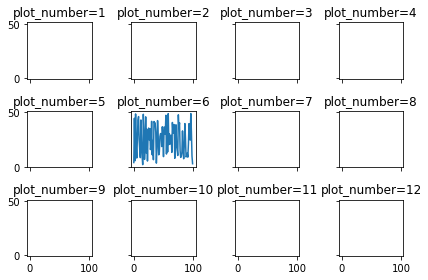

In [5]:
fig, axes = plt.subplots(3, 4, sharex=True, sharey=True)

# loop through axes
for i, ax in enumerate(axes.flat):
    
    ax.set_title('plot_number=' + str(i+1))  # add 1 to plot_number since it starts counting at 1

# another way to access individual subplots
axes[1, 1].plot(np.random.rand(100)*50)
# make plot look nicer
fig.tight_layout()  # Use to make plot look nicer


### axes layout

[`fig.tight_layout()`](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.tight_layout): convenience function to automatically improve spacing between subplots (already used above).

[`fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)`](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.subplots_adjust): Any of the keywords listed may be used to override the default values. In order, the adjust the left, bottom, right, and top of the subplots, the width and height for space between subplots. These values can be altered graphically when using a GUI version of a plot in iPython.

### axis control

`ax.set_xlim(xmin, xmax)`, `ax.set_ylim(ymin, ymax)`: Set the x and y axis limits to xmin, xmax and ymin, ymax, respectively.

#### [axis](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.axis)

The axis values by default encompass the plotted data comfortably, usually giving some space at the edges, depending on the numbers. However, this can be modified. Common usages:

`axis('equal')`: sets x and y limits so that the increments on both axes are equal lengths.

`axis('tight')`: sets axis limits to just encompass the data, with no extra space on the ends.

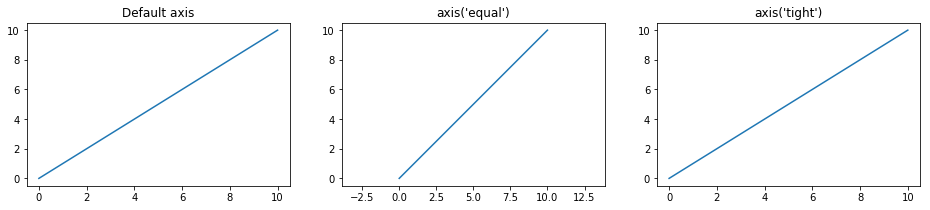

In [6]:
# axis examples
x = np.linspace(0, 10)

fig = plt.figure(figsize=(16, 3))

# No adjustments to axis, depending on version this gives same result as `axis('tight')`
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(x, x)
ax1.set_title('Default axis')

# Using axis('equal')
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(x, x)
ax2.axis('equal')
ax2.set_title("axis('equal')")

# Using axis('tight')
ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(x, x)
ax3.axis('tight')
ax3.set_title("axis('tight')")

---
###  *Exercise*

> Create figures with multiple axes two ways: with `add_subplot` and with `subplots`. Plot something simple, then label the x and y axis, and try changing the limits of the x and y axis with `xlim`, `ylim` and `axis`, and adjusting the overall character with `tight_layout` and `subplots_adjust`. Change the fontsize and color of your labels.

> Help the other students at your table: if you are finished, you should be looking around to see who could use some help. Be prepared to show off your results!

---

**Plot Example**
![sample](http://cbio.ensmp.fr/~nvaroquaux/jhepc/_images/entry10.png)
http://cbio.ensmp.fr/~nvaroquaux/jhepc/2013/entry10/index.html

### Plotting with `datetime` objects

If you want to plot with time, use `datetime` objects to hold the time/dates. Then when you plot, things will work out nicely. In fact, in the following example, the plotted dates will be formatted correctly whether or not you plot with the special function [`plot_date()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot_date). But, to have them be readable, we need to rotate the labels and choose the date formatting we prefer.

The following is a bunch of code to read in the data from an earlier homework assignment. We end up with a dictionary of time series.

In [7]:
from datetime import datetime
missing_value = -999

# Copied some code from class materials
f = open('../data/02_GPS.dat')
f.seek(0)  # This sets the pointer back to the beginning of the file. This allows us to run this
           # block of code many times without reopening the file each time.

gps = {}  # initialize dictionary
gps['datetimes'] = []             # initialize datetimes list
gps['speed'] = []                 # initialize speed list
gps['dir'] = []
for line in f.readlines():        # iterate over each line in the file. Each line is a string.
    data = line.split('\t')       # split the line of text into words, each separated by tabs, to get full drifter name
    if data[0] == 'Trackpoint':   # We only want to consider lines that begin with 'Trackpoint', as these hold the data
        datetimeinfo = data[2].split()
        date = datetimeinfo[0].split('/')
        month = int(date[0])
        day = int(date[1])
        year = int(date[2])
        time = datetimeinfo[1].split(':')
        hour = int(time[0])
        mins = int(time[1])
        sec = int(time[2])
        if datetimeinfo[2] == 'PM':
            hour = hour + 12
        # create the datetime object for this line and append onto our list
        gps['datetimes'].append(datetime(year, month, day, hour, mins, sec))
        # now deal with speed
        if len(data) > 8:  # this catches the one weird line with fewer tabs, which has no speed
            speed = data[7].split(' ')[0]
            deg = data[8].split('\u00b0')[0]
            if speed == '':
                gps['speed'].append(missing_value)  # there aren't values available for many entries
            else:  # it is a string containing a number
                gps['speed'].append(float(speed))
                gps['dir'].append(float(deg))  
        else:
            gps['speed'].append(missing_value)
            gps['dir'].append(missing_value)  # there aren't values available for many entries
            
    else:
        continue

In [8]:
# Need to mask out missing values
imissing = np.asarray(gps['speed'][:]) == -999
gps['speed'] = np.ma.masked_where(imissing, gps['speed'])
gps['dir'] = np.ma.masked_where(imissing, gps['dir'])  # these are missing at the same times as speed since they're related

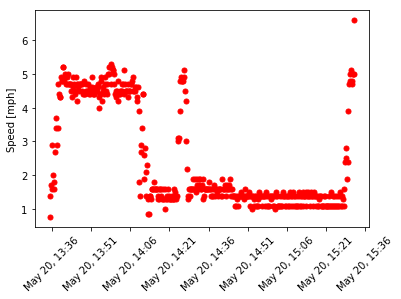

In [9]:
import matplotlib.dates
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(gps['datetimes'], gps['speed'], 'ro', ms=5)

# labels
# ax.set_xlabel('Times')
ax.set_ylabel('Speed [mph]')

# Fix the formatting of the dates since ugly
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%B %d, %H:%M'))
plt.xticks(rotation=45);  # rotating usually important for dates

### ticks, ticklabels, spines

Spines are the lines making up the x and y axis — both top/bottom and left/right. Ticks are the locations of the little marks (ticklines) along the axis, and ticklabels are the text. You can control each of these independently in a couple of ways, including the following and with `tick_params`.

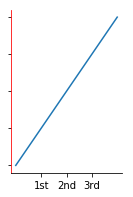

In [10]:
x = np.linspace(0, 4)

fig = plt.figure(figsize=(2, 3))
ax = fig.add_subplot(111)
ax.plot(x, x)

# turn off right and top spines:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Change color of left spine
ax.spines['left'].set_color('r')

# # But the ticks on the top and right axis are still there!
# # That's because they are controlled separately.

ax.xaxis.set_ticks_position('bottom')  # turns off top tick marks

ax.set_yticklabels('')  # Turn off y tick labels (the text)

ax.set_xticks([1, 2, 3]);

xticklabels = ['1st', '2nd', '3rd']
ax.set_xticklabels(xticklabels)

### Removing offset from axis

By default, matplotlib will format the axis with a relative shift if there is a large difference in the axis value range. Sometimes this is helpful and sometimes it is annoying. We can turn this off with `ax.get_xaxis().get_major_formatter().set_useOffset(False)`.

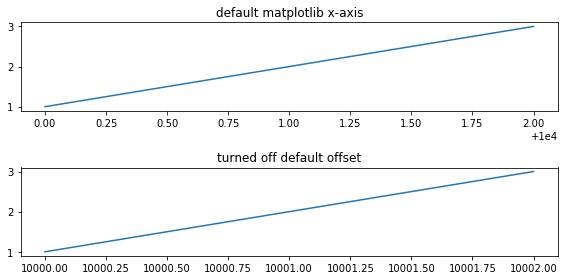

In [11]:
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(211)
ax1.plot([10000, 10001, 10002], [1, 2, 3])
ax1.set_title('default matplotlib x-axis')

ax2 = fig.add_subplot(212)
ax2.plot([10000, 10001, 10002], [1, 2, 3])
ax2.set_title('turned off default offset')
ax2.get_xaxis().get_major_formatter().set_useOffset(False)

fig.tight_layout()

---
###  *Exercise*

> Using the data read in above from `02_GPS.dat`, plot the drifter direction vs. the datetimes at which the data were taken. Label the plot and make it look nice and readable. Then remove the right and top spines, ticks, and ticklabels so that we are left with just the left and bottom indicators.

---

### Legends

[`ax.legend([possible sequence of strings], loc)`](http://matplotlib.org/api/legend_api.html#matplotlib.legend.Legend)

where loc tells where in the axes to place the legend:

    'best'         : 0, (only implemented for axes legends)
    'upper right'  : 1,
    'upper left'   : 2,
    'lower left'   : 3,
    'lower right'  : 4,
    'right'        : 5,
    'center left'  : 6,
    'center right' : 7,
    'lower center' : 8,
    'upper center' : 9,
    'center'       : 10,

A legend or key for a plot can be produced by matplotlib by either labeling plots as they are plotted and then calling the legend command, or by plotting and then labeling them in order within the legend command.

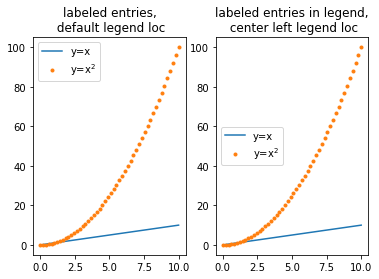

In [12]:
x = np.linspace(0, 10)

fig = plt.figure()

# Labeled plots as they were plotted
ax1 = fig.add_subplot(121)
ax1.plot(x, x, label='y=x')
ax1.plot(x, x**2, '.', label='y=x$^2$')
ax1.legend()
ax1.set_title('labeled entries,\n default legend loc')

# Chose specific location for legend and labeled plots in the legend in order of plotting
ax2 = fig.add_subplot(122)
ax2.plot(x, x)
ax2.plot(x, x**2, '.')
ax2.legend(('y=x', 'y=x$^2$'), loc='center left')
ax2.set_title('labeled entries in legend,\n center left legend loc')


### Plotting inputs

#### [colors](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors)

A handful of colors are available by a single letter code:
- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white, 
- and many more are available by (html) name:

![color chart](http://i.stack.imgur.com/k2VzI.png)
http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

Other inputs to matplotlib possible:

* Gray scale: a string with a float in it between 0 (black) and 1 (white)
* Hex: '#eeefff'
* RGB tuple in the range [0,1]: [0.1, 0.2, 0.3]

#### [line styles and markers](http://matplotlib.org/1.3.1/examples/pylab_examples/line_styles.html)

There are several line styles and many markers available for plotting. You can plot a marker alone, a line alone, or a combination of the two for even more options. Here are some examples:

![line styles and markers](http://matplotlib.org/1.3.1/_images/line_styles.png)
http://matplotlib.org/1.3.1/examples/pylab_examples/line_styles.html

#### options

- `markersize` or `ms`: how large the markers are, if used
- `markeredgecolor` or `mec`: color of marker edge, can be None
- `markerfacecolor` or `mfc`: color of marker face, case be None
- `linewidth` or `lw`: width of line if using a linestyle
- `color`: color of line or marker
- `alpha`: transparency of lines/markers, from 0 (transparent) to 1 (opaque)

#### Plotting usage examples

Many usage examples for `plot` can be found with

    plt.plot?
    
Can use some shortcuts for simple options:

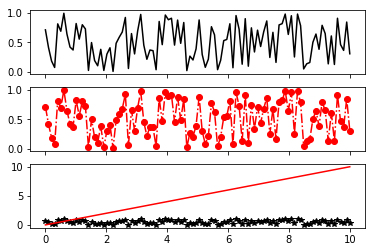

In [13]:
x = np.linspace(0, 10, 100)
y = np.random.rand(100)

fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(x, y, 'k-')  # Plots with a black line
axes[1].plot(x, y, 'ro-.')  # Plots with a red dashed line with stars
axes[2].plot(x, y, 'k*', x, x, 'r')  # can plot more than one line with one call without keywords

For more control, need to use keyword arguments. For example, unless you want to use one of the single-letter color names, you need to use the keyword `color` to choose your color.

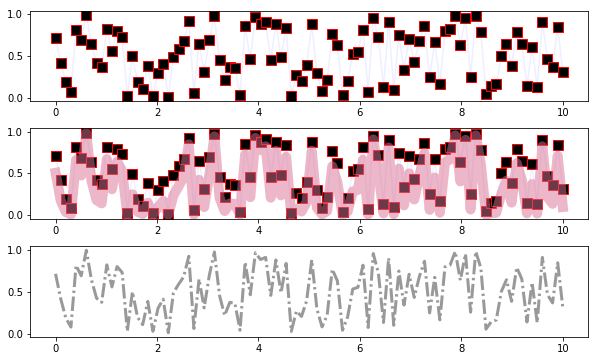

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(10, 6))
# Large light blue squares (defined by hex) with red edges
axes[0].plot(x, y, color='#eeefff', ms=10, marker='s', mec='r', mfc='k') 
axes[1].plot(x, y, color='#eeefff', ms=10, marker='s', mec='r', mfc='k') 
axes[1].plot(x, y**2, color='palevioletred', linewidth=10, alpha=0.5)  # Thick, half-transparent line
axes[2].plot(x, y, '-.', color='0.6', lw=3)  # grayscale line
fig.subplots_adjust(hspace = 0.3)

---
###  *Exercise*

> The following don't work. Why?

    plt.plot(x, y, 'r*b:')
    plt.plot(x, y, 'r*', ms=20, x, y, 'b:')

---

## Example

Let's plot something from the CTD data we used in numpy.

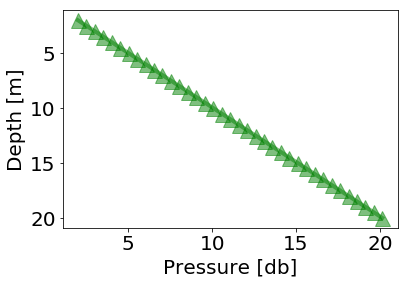

In [15]:
data = np.loadtxt('../data/CTD.txt', comments='*')

# set up figure
fig = plt.figure()
ax = fig.add_subplot(111)

# plot data
ax.plot(data[:,0], data[:,1], 'g-^', lw=4, ms=15, alpha=0.5)
ax.invert_yaxis()  # since depth below sea level

# labels
ax.set_xlabel("Pressure [db]", fontsize=20)
ax.set_ylabel("Depth [m]", fontsize=20)

# change font size of tick labels
ax.tick_params(labelsize=20)

---
###  *Exercise*

> Use the CTD data set from the previous example and compare two sets of temperature data: the temperature and the potential temperature. They are related but different measures, but they have similar values that we'd like to compare. Plot both of them vs. depth, making sure that you distinguish the two lines, label your plot appropriately, and use a legend.

---

### Get current plot

These can be used if you didn't properly set up your figure in the first place and want to be able to reference the current plot.

[`plt.gca()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.gca): Gets the current Axes instance.

[`plt.gcf()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.gcf): Gets the current Figure instance.

### Labels with math

Sometimes we want to be able to use $\LaTeX$ to write math in axis labels, especially for units. We can do this in matplotlib! We just have to use proper $\LaTeX$ notation for writing the math, and put an 'r' in front of the string, though often the 'r' doesn't appear to be needed.

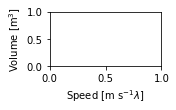

In [16]:
fig = plt.figure(figsize=(2, 1))
ax = fig.add_subplot(111)
ax.set_xlabel('Speed [m s$^{-1} \lambda$]')
ax.set_ylabel('Volume [m$^{3}$]')

### [savefig](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig)

`fig.savefig(fname, dpi=None, bbox_inches='tight')`

This is how you can save the figure that you have made. Input a file name with file extension you want, fname,  and the dots per inch if you want something higher than the default. `bbox_inches='tight'` trims the white space around the figure; alternatively a number can be input to pad the figure if it cuts too close, but the 'tight' option works most of the time.

### *Good design principles*

We all need to spend a bit of extra time to make really good plots instead of just-ok plots. This is worth the time because of how much clearer the result can be, which improves clarity, understanding, and communication.

[Edward Tufte](http://www.edwardtufte.com/tufte/) has books about how to think about design principles. A fundamental part of his thinking is to show the data without extra junk that doesn't add to the plot — he calls this extra plotting stuff "chartjunk". For example, if you have a plot with gridlines, make sure the gridlines are visible but not dominating the actual data.

Some guidelines to follow:
* Always label all axes, with units if appropriate;
* Make all text large enough to be easily seen by whatever type of viewer will be seeing your image — fontsize needs to be larger for a presentation than for a paper — this includes the ticklabels!;
* Make all lines thick enough to be easily seen;
* Make all lines/markers distinct in both color and line/marker style so that the legend is correct even in grayscale;
* Use colors that are complementary! The default choices aren't usually so pretty (though `matplotlib` is having a style defaults update soon);
* Don't forget to pay attention to edge lines on markers and bars, the font style, and other details;
* You can update your own defaults with the [matplotlibrc file](http://matplotlib.org/users/customizing.html) or you can use other people's, like from the [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) (statistical data visualization) package:

![Seaborn Example](http://stanford.edu/~mwaskom/software/seaborn/_images/hexbin_marginals.png)
http://stanford.edu/~mwaskom/software/seaborn/examples/hexbin_marginals.html


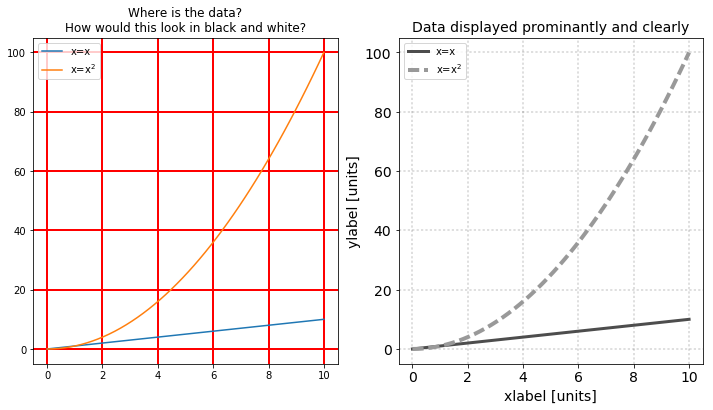

In [17]:
x = np.linspace(0, 10)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x, x, x, x**2)
ax1.grid(True, color='r', linestyle='-', linewidth=2)
ax1.set_title('Where is the data?\nHow would this look in black and white?')
ax1.legend(('x=x', 'x=x$^2$'))

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(x, x, '0.3', linewidth=3)
ax2.plot(x, x**2, '0.6', linewidth=4, linestyle='--')
ax2.grid(True, color='k', linestyle=':', linewidth=0.25)
ax2.set_title('Data displayed prominantly and clearly', fontsize=14)
ax2.set_xlabel('xlabel [units]', fontsize=14)
ax2.set_ylabel('ylabel [units]', fontsize=14)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
ax2.legend(('x=x', 'x=x$^2$'), loc='best')

# C. Histogram

A histogram shows how many instances of data are in a particular bin in your data set. This is more of a mathematical thing, but it doesn't mean much without a plot.

We are using the matplotlib `hist` function, but note that there are several options available for 1D or 2D analysis, and depending on how much control you want (`hist2d`, `histogram`, `histogram2d`, `histogramdd`).

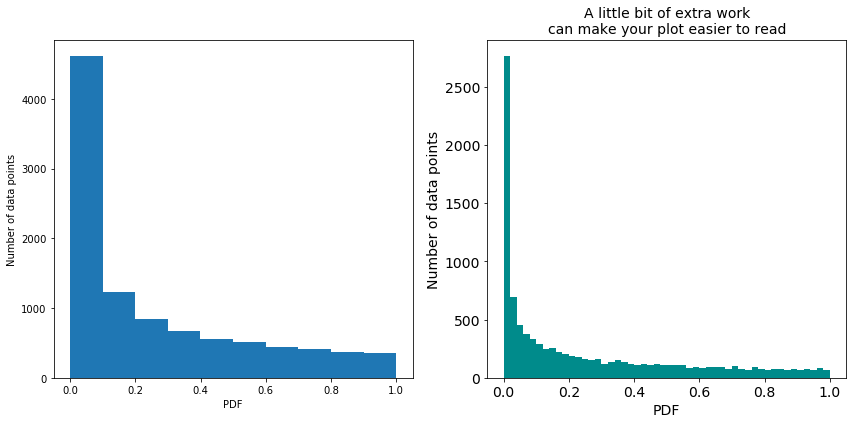

In [18]:
import scipy.stats

# rv = scipy.stats.cosine.rvs(size=1000)
rv = np.random.rand(10000)**3

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(rv)
ax1.set_xlabel('PDF')
ax1.set_ylabel('Number of data points')

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(rv, bins=50, color='darkcyan', lw=0.1)
ax2.set_xlabel('PDF', fontsize=14)
ax2.set_ylabel('Number of data points', fontsize=14)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
ax2.set_title('A little bit of extra work\ncan make your plot easier to read', fontsize=14)

fig.tight_layout()

# D. 2D plots

A fundamental part of 2 dimensional plots is how to input the (x, y) coordinates, and this mainly depends on whether we have *structured* or *unstructured* data. A 2D array of values that correspond to (x,y) points that increase monotonically is structured. Unstructured data cannot be easily put into an array because the corresponding (x,y) points do not need to be consistent in each dimension. 

The function `scatter` can be used to plot unstructured data whereas `pcolor`/`pcolormesh` and `contour`/`contourf` required structured data. The following examples illustrate these differences.

## scatter (unstructured data)

Scatter plots are good for plotting x, y, z triplets when they are in triplet form (lists of x, y, z, coordinates) which may be randomly ordered, instead of ordered arrays. In fact, you may use 4 sets of data as well (e.g., x, y, z, t).

We can really capture 4 sets of information together in a `scatter` plot:

* x vs. y with markers (just like we can do with `plot`)
* x vs y with marker color representing z
* x vs. y with marker color and marker size representing two more sets of data

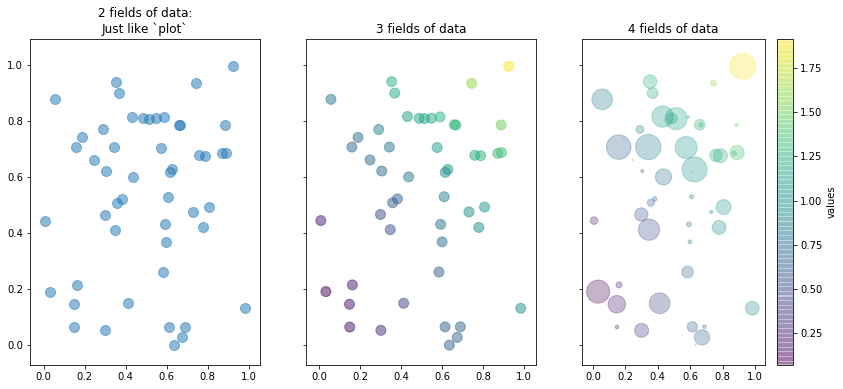

In [19]:
# from http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = x+y**2
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(14,6))
axes[0].scatter(x, y, s=100, alpha=0.5)
axes[0].set_title('2 fields of data:\nJust like `plot`')
axes[1].scatter(x, y, s=100, c=colors, alpha=0.5)
axes[1].set_title('3 fields of data')
# the mappable is how the colorbar knows how to set up the range of data given the colormap
mappable = axes[2].scatter(x, y, s=area, c=colors, alpha=0.3)
axes[2].set_title('4 fields of data')
cb = fig.colorbar(mappable)
cb.set_label('values')

---
### *Exercise*

> Plot 4 columns of data from '../data/CTD.txt' together using the `scatter` function. Make sure all markers are visible, that everything is properly labeled, that you use a colorbar, etc.

---

## Arrays of Coordinates

To plot structured data, you need arrays of coordinates that store the typically (x,y) locations of the data you have. You will sometimes be given this information, but sometimes you need to make some changes.

Sometimes you have the data itself and need to create the arrays to represent the coordinates, which you can do with `np.meshgrid`.

If you are starting with unstructured data and want to change it to be structured, you can interpolate. 

We will build up the same example for both of these concepts.

### `meshgrid`

`meshgrid` converts from a x and a y vector of coordinates to arrays of x and y coordinates. The vectors are copied across the array. This image from Microsoft Excel shows how to think about it.

![example](https://i.stack.imgur.com/8Mbig.png)

Once you have these arrays, you can use some of the following plotting techniques.

Let's create synthetic coordinates and data using random numbers.

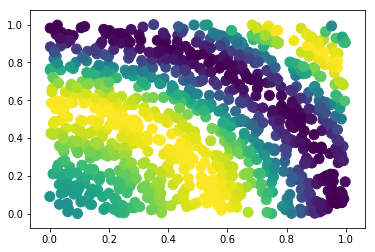

In [20]:
x = np.random.rand(1000)  # x coordinate
y = np.random.rand(1000)  # y coordinate
z = np.sin((x**2 + y**2)*5.0)  # data values at the x, y locations

plt.scatter(x, y, c=z, s=100, cmap='viridis')

We want to move from this unstructured data to structured data, which can improve visualization and allow us to make more calculations. To do this, we need to create an array of coordinates from our sporadically-located x and y coordinate data.

We need to set up coordinate arrays for x and y that cover the full range of the coordinates.

In [21]:
# set up coordinate arrays for x and y that cover the full range of the 
# x and y coordinates
xi = np.linspace(x.min(), x.max(), 501)
yi = np.linspace(y.min(), y.max(), 501)

Then, we can change from the vector to the array, like in the image. These X and Y coordinate arrays are what we'll be able to plot with and perform calculations on.

In [22]:
# X and Y are these arrays
X, Y = np.meshgrid(xi, yi)  # uniform grid

### Interpolation

Now we can interpolate our $z$ values onto the new coordinate arrays, X and Y. We cover one method of 2d interpolation here, but you can find many more details in the notebook "ST_interpolation.ipynb".

We will use [`griddata`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html) to do this two dimensional interpolation, which is not part of `numpy`. This way is not particularly fast because it cannot take advantage of structured (predictably-spaced) data. However, it generally works and is pretty straight-forward. 

    Z = scipy.interpolate.griddata(pts, z, xy, method='cubic', fill_value=0)

where `pts` is Nx2 and contains the coordinates for the input data, `z` are the values at `pts`, `xy` are the Mx2 coordinates where you want to interpolate to, `Z` are the values of the function `z` at `xy` locations. `method` can be 'linear', 'nearest', 'cubic', and `fill_value` fills in outside of the points.

The data that we want to interpolate is put first into `griddata`. The first input, `pts`, is Nx2 and contains the coordinates for the input data. Here is how we can get the original data coordinates into the proper setup:

In [23]:
pts = np.vstack((x,y)).T  # combine x and y to get Nx2 array

Next we need the coordinate locations of where we want to interpolate the data to, which are of shape Mx2. `griddata` allows us to interpolate to unstructured coordinates as well as structured coordinates, so it cannot assume you are inputting structured arrays. Therefore, we put them in as coordinates, like so:

In [24]:
xy = np.vstack((X.flat, Y.flat)).T

Now we can make our call to `griddata` to run the interpolation, and then reshape the resulting $Z$ output into an array to match the coordinates.

In [25]:
import scipy.interpolate

Z = scipy.interpolate.griddata(pts, z, xy, method='cubic', fill_value=0)

# reconstitute the output to structured array so we can plot it with pcolormesh
Z.shape = X.shape

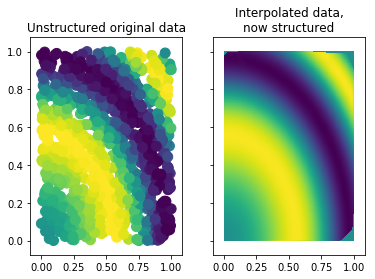

In [26]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
axes[0].scatter(x, y, c=z, s=100, cmap='viridis')
axes[0].set_title('Unstructured original data')

axes[1].pcolormesh(X, Y, Z, cmap='viridis')
axes[1].set_title('Interpolated data,\nnow structured')

## `quiver(x, y, u, v)`

The `quiver` command allows us to plot arrows. Typically they are used to show the direction of flow. They can be pretty difficult to work with because of the necessary number of available parameters you can tweak, but they are very useful for showing movement from your data (see plot example at top of notebook).

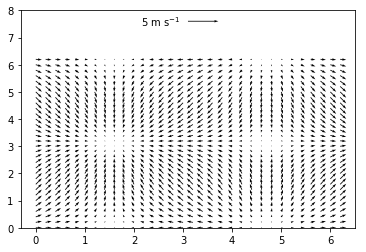

In [27]:
# http://matplotlib.org/examples/pylab_examples/quiver_demo.html
X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)

fig = plt.figure()
ax = fig.add_subplot(111)
Q = ax.quiver(X, Y, U, V)
ax.set_ylim(0, 8)
qk = ax.quiverkey(Q, 0.5, 0.95, 5, r'5 m s$^{-1}$', labelpos='W')


## `pcolor/pcolormesh(X, Y, C, cmap=colormap, vmin=data_min, vmax=data_max)`

`pcolor` and `pcolormesh` are very similar and plot arrays. `X` and `Y` are coordinate locations of the data array `C`. The `cmap` keyword argument will take in a colormap instance (some strings are allowed here too), and `vmin`, `vmax` set the minimum and maximum values represented in the plot.

A few notes:
* The `X` and `Y` locations associated with the `C` values are assumed to be at the corners of the block of information represented by an element in `C`; so `X` and `Y` should have one more element in both the x and y directions.
 - if `X` and `Y` are given with the same shape as `C`, the final row and column in `C` will be ignored.
* `pcolormesh` is an alternative to `pcolor` that is much faster due to the differences in their basic setup — basically we can just always use `pcolormesh` and not worry about the differences.

Here we have an example of a `pcolormesh` plot. It shows the sea surface height in the northwest Gulf of Mexico as a single time, as calculated by a numerical model run in the oceanography department. Red colors represent where the sea level is above a vertical reference level, maybe mean sea level, and blue colors represent where the sea level is below the reference level.

Note that the land can be seen as a dark shade of blue, and the extent of the colorbar has been controlled in the call to `pcolormesh`.

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


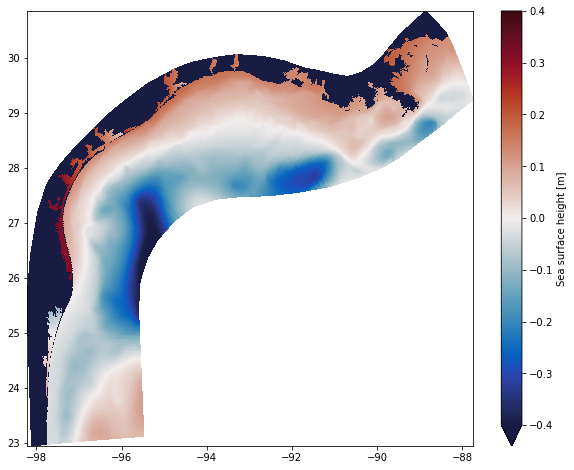

In [28]:
d = np.load('../data/model.npz')

import cmocean.cm as cmo

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
mappable = ax.pcolormesh(d['lon'], d['lat'], d['ssh'][0], cmap=cmo.balance, vmin=-0.4, vmax=0.4)  # use the gray colormap to look more realistic
cb = fig.colorbar(mappable, extend='min')
cb.set_label('Sea surface height [m]')

---
### *Exercise*

> Mask the sea surface height model output so that land – currently shown as dark blue – is not colored.

> What do `vmin` and `vmax` in the `pcolormesh` command control? Change their values and see the result. What values *should* be used in this call and why?

> What does `extend` control in the colorbar call?

---

## `contour/contourf(X, Y, Z, N or V, colors, cmap, levels)`

The setup for `contour` and `contourf` are similar: both take in structured x, y arrays with Z information to plot in two dimensions. However, while `pcolor` plots boxes of data, `contourf` groups together similarly-sized data for plotting. `contour` plots isolines, which have equal values along the lines (like contours on a terrain map). Also, `contour` and `contourf` assume that the input x, y locations give the location of the datapoint itself, as opposed to the edges of a box in `pcolor`.

Some useful optional inputs include N, the number of bins of data to use (default 10) or V, a sequence of values at which to plot; colors, a string or tuple of color inputs to use for the contours; cmap, a colormap instance to use instead of the colors; and levels, where you can specify the actual levels to use in the contours. There is an option to input `vmin` and `vmax` like in `pcolor` but this typically doesn't work as intended — it's better to use `levels` instead.

Note that you can also use `contour` in conjunction with `cslabel` to label in the plot the value of the contours.

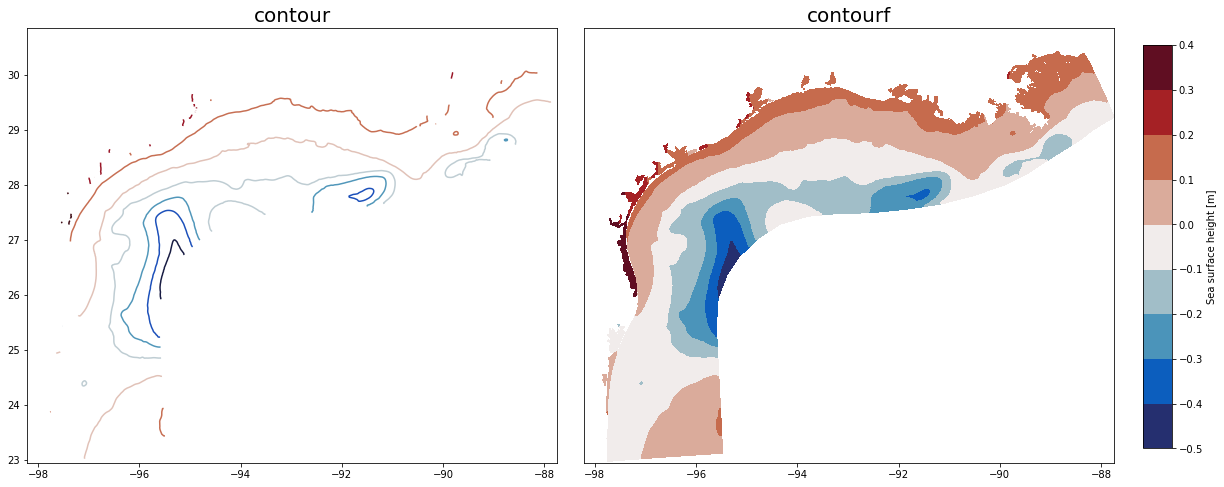

In [29]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1, 2, 1)
ax.contour(d['lon'], d['lat'], d['ssh'][0], cmap=cmo.balance)  # use the gray colormap to look more realistic
ax.set_title('contour', fontsize=20)

ax2 = fig.add_subplot(1, 2, 2)
mappable = ax2.contourf(d['lon'], d['lat'], d['ssh'][0], cmap=cmo.balance)  # use the gray colormap to look more realistic
ax2.set_yticks([])
ax2.set_title('contourf', fontsize=20)

# Make room for the colorbar on the right size, and scoot the subplots closer together
fig.subplots_adjust(right=0.88, wspace=0.05)
# Add an axes for the colorbar so that spacing looks right
cax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
cb = fig.colorbar(mappable, extend='min', cax=cax)
cb.set_label('Sea surface height [m]')


---
### *Exercise*

> What happens as you increase the number of contours used in the `contourf` plot? Also, try inputting different sequences of contour values to plot (the `V` keyword argument).

> Can you layer `contour` lines over `contourf` plots?

> Make the tick labels larger.

> Note that the min and max values of the colorbar are not equal, which is skewing the colors in the colorbar so that negative values only appear as white. How can you fix this so that the data is being properly presented to the viewer? What is the proper way to present it?

---

## colorbar

When you plot multiple subplots that have the same colormap, you need to individually set them up to properly show the range of colors in the colorbar.

- For `pcolor/pcolormesh` this mean setting the `vmin/vmax` for each subplot to the same values.
- For `contourf` this means setting the `levels` attributes to be the same for all subplots.

Then you need to give the colorbar call a `mappable` instance to know what range of colors to provide. You can get a `mappable` instance by setting the call to `pcolor/pcolormesh/contourf` to a variable.

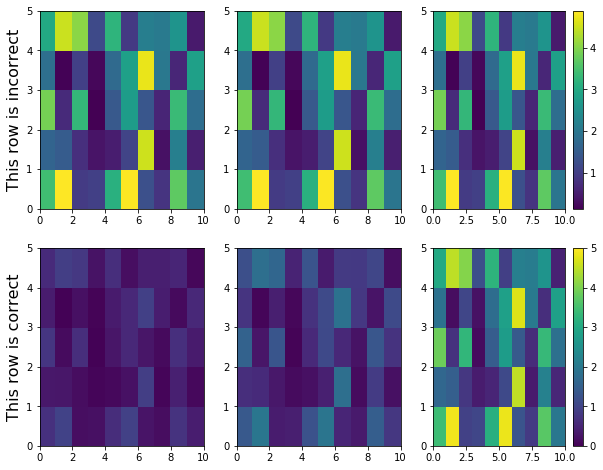

In [30]:
Z = np.random.rand(5, 10)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2, 3, 1)
ax1.pcolormesh(Z, cmap='viridis')
ax1.set_ylabel('This row is incorrect', fontsize=16)

ax2 = fig.add_subplot(2, 3, 2)
ax2.pcolormesh(Z*2, cmap='viridis')

ax3 = fig.add_subplot(2, 3, 3)
mappable = ax3.pcolormesh(Z*5, cmap='viridis')  # we choose some pcolormesh call to set the mappable variable

fig.colorbar(mappable)

# for this row of plots, we will set the max and min data values properly
# dmin = Z.min()  # min over the three plots
# dmax = (Z*5).max()  # max over the three plots

dmin = 0
dmax = 5

ax4 = fig.add_subplot(2, 3, 4)
ax4.pcolormesh(Z, cmap='viridis', vmin=dmin, vmax=dmax)
ax4.set_ylabel('This row is correct', fontsize=16)

ax5 = fig.add_subplot(2, 3, 5)
mappable = ax5.pcolormesh(Z*2, cmap='viridis', vmin=dmin, vmax=dmax)

ax6 = fig.add_subplot(2, 3, 6)
ax6.pcolormesh(Z*5, cmap='viridis', vmin=dmin, vmax=dmax)

fig.colorbar(mappable)

***Why are these two rows different, even though the same things are being plotted?***

## Colormaps

You may have used a rainbow-based colormap in your work, or seen other people use it. There are many online tirades against jet, some of which are linked to [here](https://matplotlib.org/cmocean/#why-jet-is-a-bad-colormap-and-how-to-choose-better).

Here is a [presentation](https://www.dropbox.com/s/yu9pe54z77zlirp/Fall_AGU.key?dl=0) about colormaps.

### Good colormaps to use:

#### Use for sequential data (no 0 or critical value):

Both of these sets are ok, though the first have better perceptual properties.

![](http://matplotlib.org/_images/colormaps_reference_00.png)
![](http://matplotlib.org/_images/colormaps_reference_01.png)

#### Use for diverging data (data that diverges away from a critical value, often 0):

![](http://matplotlib.org/_images/colormaps_reference_03.png)
http://matplotlib.org/examples/color/colormaps_reference.html

Reference:
http://matplotlib.org/users/colormaps.html

####  `cmocean`

I have a set of colormaps available through [`matplotlib`](http://matplotlib.org/cmocean/) and a [paper](http://tos.org/oceanography/assets/docs/29-3_thyng.pdf) about how to choose good colormaps. I'll expect you to make good choices for your colormaps — this means choosing a sequential colormap for sequential data, and diverging for diverging data. Since we know from science that the `jet` rainbow colormap is generally not a good way to represent your data, choose something else to use.

![](http://matplotlib.org/cmocean/_images/index-1.png)


# E. Advanced


## Define your own axes

### Overlaid axes
![](http://matplotlib.org/_images/demo_axes_hbox_divider.png)
http://matplotlib.org/examples/axes_grid/demo_axes_hbox_divider.html

### Complementary axes

![](http://matplotlib.org/_images/scatter_hist1.png)
http://matplotlib.org/examples/pylab_examples/scatter_hist.html

## Complex tiling: `axes_grid1`

![Example 1](http://matplotlib.org/_images/demo_axes_rgb_00.png)
http://matplotlib.org/examples/axes_grid/demo_axes_rgb.html

![Example 2](http://matplotlib.org/_images/simple_axesgrid2.png)
http://matplotlib.org/examples/axes_grid/simple_axesgrid2.html

## Magnification: `inset_axes`

![Example of inset_axes](http://matplotlib.org/_images/inset_locator_demo2.png)

http://matplotlib.org/examples/axes_grid/inset_locator_demo2.html

# F. Other plotting packages

Note that there are many other plotting packages to explore. Here is a brief list:

* 3D (in matplotlib)
* Bokeh
* mpl3d
* mayavi

# Bonus! Now with Nobel Prize!

Matplotlib, good colormaps, and strong design principles were used in a 2015 LIGO paper!

![LIGO paper](https://pbs.twimg.com/media/Ca8jlVIWcAUmeP8.png:large)